In [1]:
! pip install matplotlib numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
import IPython.display as ipd
import math

## Pure tone generation

In [168]:
from enum import Enum
from functools import partial
from scipy import signal

class Waveform(Enum):
    @staticmethod
    def triangular(args):
        return signal.sawtooth(args, 0.5)
    
    HARMONIC = partial(np.sin)
    SQUARE = partial(signal.square)
    TRIANGULAR = partial(triangular.__func__)
    SAWTOOTH = partial(signal.sawtooth)
    

def tone(f, t, waveform, fs):
    samples = np.linspace(0, t, round(t * fs + 1))
    return waveform.value( 2* np.pi * f * samples)

In [169]:
f = 960
t = 5
fs = 5000
samples =  np.linspace(0, t, round(t * fs + 1))


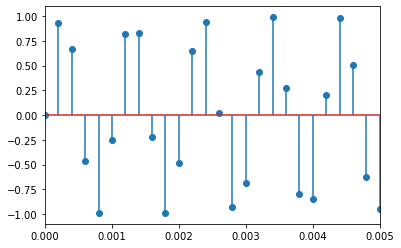

In [48]:
plt.xlim(0, 0.005)
values = tone(f, t, Waveform.HARMONIC, fs)
plt.stem(samples, values)
ipd.Audio(values, rate=fs)
# write('HARMONIC.wav', fs, values)

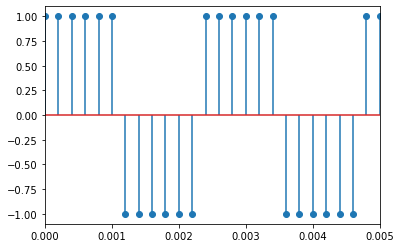

In [13]:
plt.xlim(0, 0.005)
values = tone(f, t, Waveform.SQUARE, fs)
plt.stem(samples, values)
ipd.Audio(values, rate=fs)
# write('SQUARE.wav', fs, values)

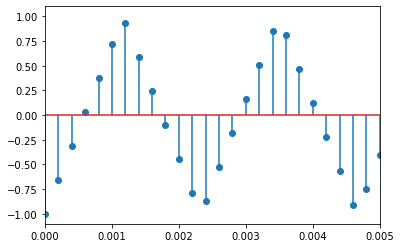

In [14]:
plt.xlim(0, 0.005)
values =  tone(f, t, Waveform.TRIANGULAR, fs)
plt.stem(samples, values)
ipd.Audio(values, rate=fs)
# write('TRIANGULAR.wav', fs, values)

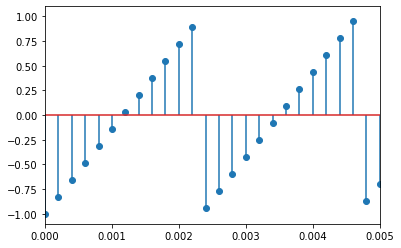

In [15]:
plt.xlim(0, 0.005)
values =  tone(f, t, Waveform.SAWTOOTH, fs)
plt.stem(samples, values)
ipd.Audio(values, rate=fs)
# write('SAWTOOTH.wav', fs, values)

## Function musical_tone 

In [170]:
def right_exp(a, N):
    """
    Create function like y(x)=a^(x/N)
    """
    return lambda x: [math.pow(a, i/N ) for i in x] 

def single_square_wave(N, M):
    """
    Create function like y(x) = 1 when ( N <= x <= M ) otherwise 0 
    """
    return lambda x: [ int(N <= i <= M) for i in x]

def apply_damping(input_signal , db, t, fs):
    damping_in_times = math.pow(10, db / 20) # Db = 20 log(F2/F1)
    samples_count = len(input_signal)
    
    exp_func = right_exp(damping_in_times, t)
    sqr_func = single_square_wave(0, t)
    
    samples = np.linspace(0, t,round(t * fs + 1))
    
    return input_signal * exp_func(samples) * sqr_func(samples)

def piano_stectre_imitate(signal):
    F_UPPER_BOUND_PIANO = 2000
    
    sqr_signal = single_square_wave(0, F_UPPER_BOUND_PIANO)
    exp_signal = right_exp(0.2, F_UPPER_BOUND_PIANO)
    
    output_signal = {}
    
    for f_tone, tone in signal.items():
        output_signal.update(  { f_tone : np.multiply(tone, sqr_signal([f_tone])) })
            
    result = {}
    for f_tone, tone in output_signal.items():
        result.update(  { f_tone : np.multiply(tone, exp_signal([f_tone])) })
        
    return result
    

In [151]:
F_UPPER_BOUND = 20000

def musical_tone(f, t , waveform = Waveform.HARMONIC, fs = 44100, db = -20):
    
    f_tones = [f]
    while (f_tones[-1] + f <= F_UPPER_BOUND):
        f_tones.append(f_tones[-1] + f)
    
    tones = { x : tone(x, t, Waveform.HARMONIC, fs) for x in f_tones }
      
    imitated_signal = piano_stectre_imitate(tones)        
    
    result_signal = np.sum([ t for _, t in imitated_signal.items() ], 0) 
    
    dumped_signal = apply_damping(result_signal, db, t, fs)
    
    norm_signal = dumped_signal / max(dumped_signal)
    
    return norm_signal

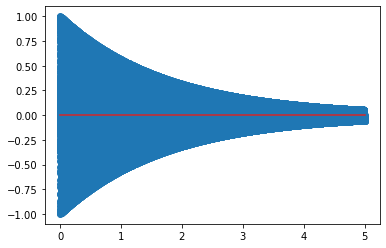

In [171]:
# plt.xlim(0, 0.5)
f = 260
t = 5
fs = 44100
samples = np.linspace(0, t, round(t * fs + 1))
result = musical_tone(f, t, fs=fs, db= -25)
plt.stem(samples, result)
ipd.Audio(result, rate=fs)

## Music creation

In [225]:
fs = 44100
def D4(t, db):
    return musical_tone(293, t, fs=fs, db=db) 
def E4(t, db):
    return musical_tone(329, t, fs=fs, db=db) 
def F4(t, db):
    return musical_tone(349, t, fs=fs, db=db) 
def C4(t, db):
    return musical_tone(261, t, fs=fs, db=db) 
def A4(t, db):
    return musical_tone(440, t, fs=fs, db=db) 
def G4(t, db):
    return musical_tone(391, t, fs=fs, db=db) 
def G3(t, db):
    return musical_tone(196, t, fs=fs, db=db) 
def F3(t, db):
    return musical_tone(174, t, fs=fs, db=db) 
def D3(t, db):
    return musical_tone(146, t, fs=fs, db=db) 
def E3(t, db):
    return musical_tone(164, t, fs=fs, db=db) 

In [226]:
# Source https://virtualpiano.net/?song-post-10884

result = np.concatenate((D4(0.3, -5), E4(0.3, -5), F4(0.5, -15), C4(0.5, -15), F3(1.5, -35),
                        D4(0.3, -5), E4(0.3, -5), F4(0.5, -15), C4(0.8, -25), A4(0.4, -35), G4(1.5, -65),
                        D4(0.3, -5), E4(0.3, -5), F4(0.5, -15), C4(0.5, -15), G3(1, -25),
                        F3(1, -35),
                        D3(0.6, -15), F3(0.2, -5), F3(0.5, -15), E3(2, -65)))

ipd.Audio(result, rate=fs)